Analyzing data...
Historical Data Schema:
        id  quiz_id                       user_id  \
0  336497       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
1  336448        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
2  333330       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
3  333242        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
4  329504       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   

                    submitted_at                     created_at  \
0  2025-01-17T15:30:18.027+05:30  2025-01-17T15:30:18.044+05:30   
1  2025-01-17T15:17:44.042+05:30  2025-01-17T15:17:44.056+05:30   
2  2025-01-16T20:13:19.682+05:30  2025-01-16T20:13:19.699+05:30   
3  2025-01-16T20:00:11.562+05:30  2025-01-16T20:00:11.573+05:30   
4  2025-01-15T20:34:39.462+05:30  2025-01-15T20:34:39.478+05:30   

                      updated_at  score  trophy_level accuracy speed  ...  \
0  2025-01-17T15:30:18.044+05:30    108             2     90 %   100  ...   
1  2025-01-17T15:17:44.056+05:30     92             1    100 %   100  ...   
2  2025-01

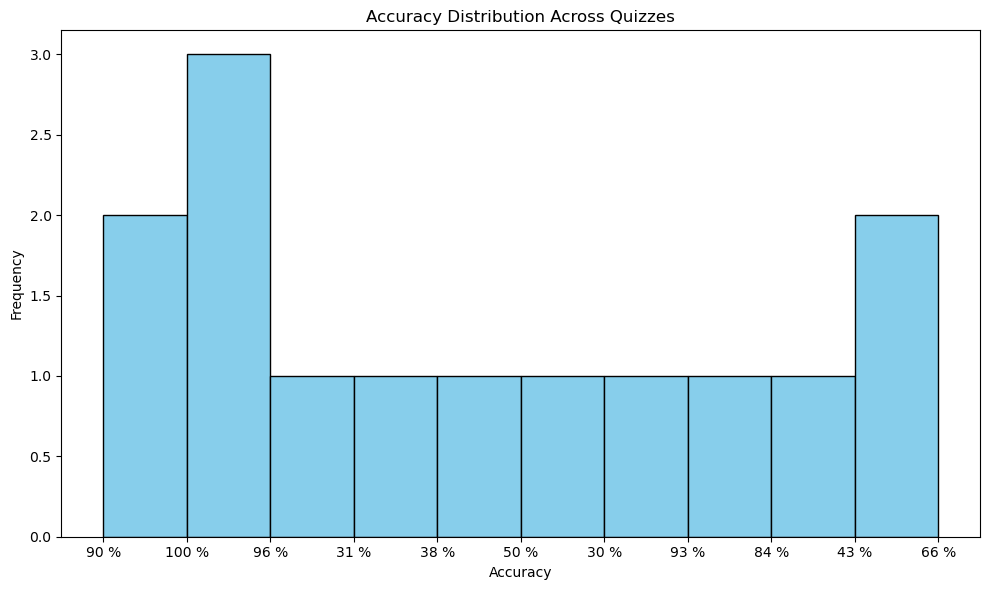

In [18]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch the data
def fetch_data(url):
    """Fetch JSON data from a given URL."""
    response = requests.get(url)
    response.raise_for_status()
    return response.json()

# URLs for data
current_quiz_url = "https://www.jsonkeeper.com/b/LLQT"
current_submission_url = "https://api.jsonserve.com/rJvd7g"
historical_data_url = "https://api.jsonserve.com/XgAgFJ"

# Load data
current_quiz_data = fetch_data(current_quiz_url)
current_submission = fetch_data(current_submission_url)
historical_data = fetch_data(historical_data_url)

# Step 2: Analyze Data
def analyze_performance(historical_data, current_submission):
    """Analyze performance based on historical and current submission data."""
    # Convert historical data to DataFrame
    historical_df = pd.DataFrame(historical_data)
    print("Historical Data Schema:\n", historical_df.head())  # Debugging

    # Filter numeric columns for aggregation
    numeric_columns = historical_df.select_dtypes(include=["number"]).columns
    required_columns = ["accuracy", "score", "correct_answers", "incorrect_answers"]
    available_columns = [col for col in required_columns if col in numeric_columns]

    if not available_columns:
        print("No numeric data available for performance analysis.")
        return pd.DataFrame(), []

    # Calculate overall performance metrics for available columns
    overall_performance = historical_df[available_columns].agg(["mean", "std", "sum"])

    # Parse response_map from current submission
    response_map = current_submission.get("response_map", {})
    print("Response Map:", response_map)  # Debugging to see the structure of the response_map

    # Filter incorrect questions based on response_map, ensuring it's a dictionary
    incorrect_questions = [
        question_id for question_id, response in response_map.items()
        if isinstance(response, dict) and not response.get("is_correct", False)
    ]

    return overall_performance, incorrect_questions

# Step 3: Generate Insights
def generate_insights(overall_performance, incorrect_questions):
    """Generate insights from analyzed data."""
    insights = []

    if overall_performance.empty:
        insights.append("No valid data available for analysis.")
    else:
        # Overall performance insights
        for column in overall_performance.columns:
            insights.append(f"{column.capitalize()} - Mean: {overall_performance.loc['mean', column]:.2f}, "
                            f"Standard Deviation: {overall_performance.loc['std', column]:.2f}, "
                            f"Total: {overall_performance.loc['sum', column]:.2f}")

    # Incorrect questions insights
    for question_id in incorrect_questions:
        insights.append(f"Question ID {question_id} was answered incorrectly.")

    return insights

# Step 4: Create Recommendations
def create_recommendations(overall_performance):
    """Provide actionable recommendations based on performance data."""
    recommendations = []

    if overall_performance.empty:
        recommendations.append("No data available to generate recommendations.")
    else:
        # General recommendations based on accuracy
        if "accuracy" in overall_performance.columns:
            average_accuracy = overall_performance.loc["mean", "accuracy"]
            if average_accuracy < 0.7:
                recommendations.append("Focus on improving overall accuracy by reviewing weak topics.")

    # Practice recommendation
    recommendations.append("Review incorrect answers and practice similar questions.")
    return recommendations

# Step 5: Visualize performance
def visualize_performance(historical_data):
    """Visualize overall performance metrics."""
    historical_df = pd.DataFrame(historical_data)

    if "accuracy" not in historical_df.columns:
        print("No 'accuracy' data available for visualization.")
        return

    plt.figure(figsize=(10, 6))
    plt.hist(historical_df["accuracy"], bins=10, color="skyblue", edgecolor="black")
    plt.title("Accuracy Distribution Across Quizzes")
    plt.xlabel("Accuracy")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Run analysis
print("Analyzing data...")
overall_performance, incorrect_questions = analyze_performance(historical_data, current_submission)

# Generate insights and recommendations
insights = generate_insights(overall_performance, incorrect_questions)
recommendations = create_recommendations(overall_performance)

# Step 6: Output results
print("\nInsights:")
print("\n".join(insights))

print("\nRecommendations:")
print("\n".join(recommendations))

# Visualize the performance
visualize_performance(historical_data)
